# Linear Regression 2 (using normal equation and sklearn)
Data source: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

## Data Description
Abstract: This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.

The data time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as â€œNAâ€.

Attribute Information:

    No: row number
    year: year of data in this row
    month: month of data in this row
    day: day of data in this row
    hour: hour of data in this row
    pm2.5: PM2.5 concentration (ug/m^3)
    DEWP: Dew Point (â„ƒ)
    TEMP: Temperature (â„ƒ)
    PRES: Pressure (hPa)
    cbwd: Combined wind direction
    Iws: Cumulated wind speed (m/s)
    Is: Cumulated hours of snow
    Ir: Cumulated hours of rain

## Preliminary EDA

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Set workplace features

In [2]:
plt.rcParams['figure.figsize'] = [13, 9]
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

### Import dataset

In [3]:
beijing = pd.read_csv('C:/Users/tohaj/Box/Programming/Data Science/DATA SETS/UCI Datasets/us_embassy_beijing_air_poll.csv')

### Check data shape/dimension

In [4]:
print('The dataset has', beijing.shape[0], 'rows and', beijing.shape[1], 'columns.')
print('The variables in the data set are: ' + str(beijing.columns.values))

The dataset has 43824 rows and 13 columns.
The variables in the data set are: ['No' 'year' 'month' 'day' 'hour' 'pm2.5' 'DEWP' 'TEMP' 'PRES' 'cbwd'
 'Iws' 'Is' 'Ir']


### Summarize the data

In [5]:
beijing.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [6]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [7]:
beijing[['No', 'year', 'month']].head(10)

,No,year,month
0,1,2010,1
1,2,2010,1
2,3,2010,1
3,4,2010,1
4,5,2010,1
5,6,2010,1
6,7,2010,1
7,8,2010,1
8,9,2010,1
9,10,2010,1


### Sublet the data

In [8]:
beijing_sub = beijing.drop(['No', 'year', 'month', 'day'], axis = 1)
beijing_sub.tail(5)

,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


### Rename rows

In [9]:
beijing_sub[['dew_pt', 'temp', 'pres', 'wind_dir', 'wind_sp', 'snow_hrs', 'rain_hrs']] = beijing_sub[['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']]

In [10]:
beijing_sub.head(5)

,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,dew_pt,temp,pres,wind_dir,wind_sp,snow_hrs,rain_hrs
0,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,-21,-11.0,1021.0,NW,1.79,0,0
1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,-21,-12.0,1020.0,NW,4.92,0,0
2,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,-21,-11.0,1019.0,NW,6.71,0,0
3,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,-21,-14.0,1019.0,NW,9.84,0,0
4,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,-20,-12.0,1018.0,NW,12.97,0,0


In [11]:
beijing_sub = beijing_sub.drop(['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], axis =1)
beijing_sub.head(3)

,hour,pm2.5,dew_pt,temp,pres,wind_dir,wind_sp,snow_hrs,rain_hrs
0,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0


### Check for missing values, -ve values

Text(0.5, 1.0, 'Heatmap of missing values in the data')

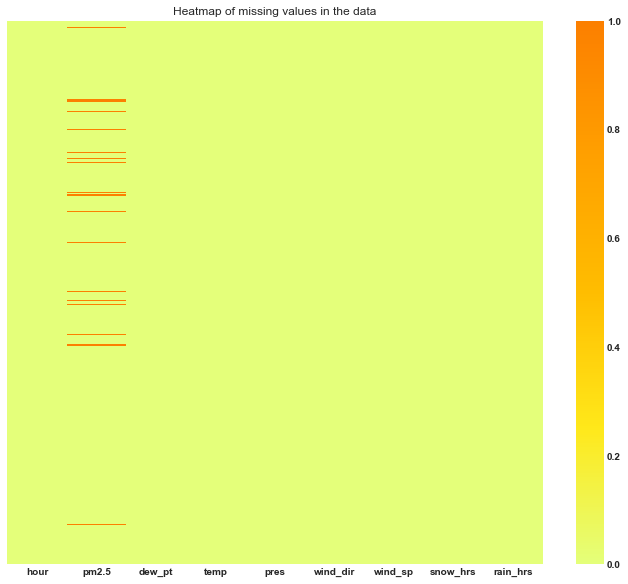

In [12]:
plt.figure(figsize = (12, 10))
sns.heatmap(beijing_sub.isnull(), cmap = 'Wistia', yticklabels = False)
plt.title('Heatmap of missing values in the data')

There are missing values on the pm2.5 variable

In [13]:
# Remove obs with missing values
beijing_new = beijing_sub.dropna(axis = 0)
beijing_new.head(30)

,hour,pm2.5,dew_pt,temp,pres,wind_dir,wind_sp,snow_hrs,rain_hrs
24,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
29,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0
30,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0
31,7,124.0,-7,-5.0,1024.0,SE,10.72,0,0
32,8,120.0,-8,-6.0,1024.0,SE,12.51,0,0
33,9,132.0,-7,-5.0,1025.0,SE,14.30,0,0


In [ ]:
beijing_new.head(10)

,hour,pm2.5,dew_pt,temp,pres,wind_dir,wind_sp,snow_hrs,rain_hrs
24,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
29,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0
30,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0
31,7,124.0,-7,-5.0,1024.0,SE,10.72,0,0
32,8,120.0,-8,-6.0,1024.0,SE,12.51,0,0
33,9,132.0,-7,-5.0,1025.0,SE,14.30,0,0


In [ ]:
beijing_new.tail(7)

,hour,pm2.5,dew_pt,temp,pres,wind_dir,wind_sp,snow_hrs,rain_hrs
43817,17,9.0,-22,-1.0,1033.0,NW,221.24,0,0
43818,18,10.0,-22,-2.0,1033.0,NW,226.16,0,0
43819,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [14]:
print('The uncleaned data (w/ missing values) has', beijing_sub.shape[0], 'rows and', beijing_sub.shape[1], 'columns')
print('The cleaned data (w/o missing values) has', beijing_new.shape[0], 'rows and', beijing_new.shape[1], 'columns')


The uncleaned data (w/ missing values) has 43824 rows and 9 columns
The cleaned data (w/o missing values) has 41757 rows and 9 columns


In [15]:
print(beijing_sub.shape[0] - beijing_new.shape[0], ' obs (rows) removed')

2067  obs (rows) removed


In [16]:
# Check for negative values
beijing_new['dew_pt'] < 0

24       True
25       True
26       True
27       True
28       True
         ... 
43819    True
43820    True
43821    True
43822    True
43823    True
Name: dew_pt, Length: 41757, dtype: bool

### Pairwise correlation of all quant variables

Text(0.5, 1.0, 'Pairwise correlation of all quant variables')

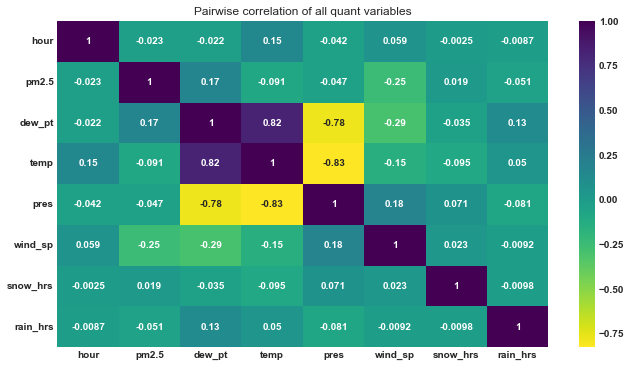

In [17]:
plt.figure(figsize = (11, 6))
sns.heatmap(beijing_new.corr(), cmap = 'viridis_r', yticklabels = True, annot = True)
plt.title('Pairwise correlation of all quant variables')

### Simple linear regression fit

Text(0.5, 1.0, 'Linear fit of Dew point vs. Temperature')

<Figure size 864x576 with 0 Axes>

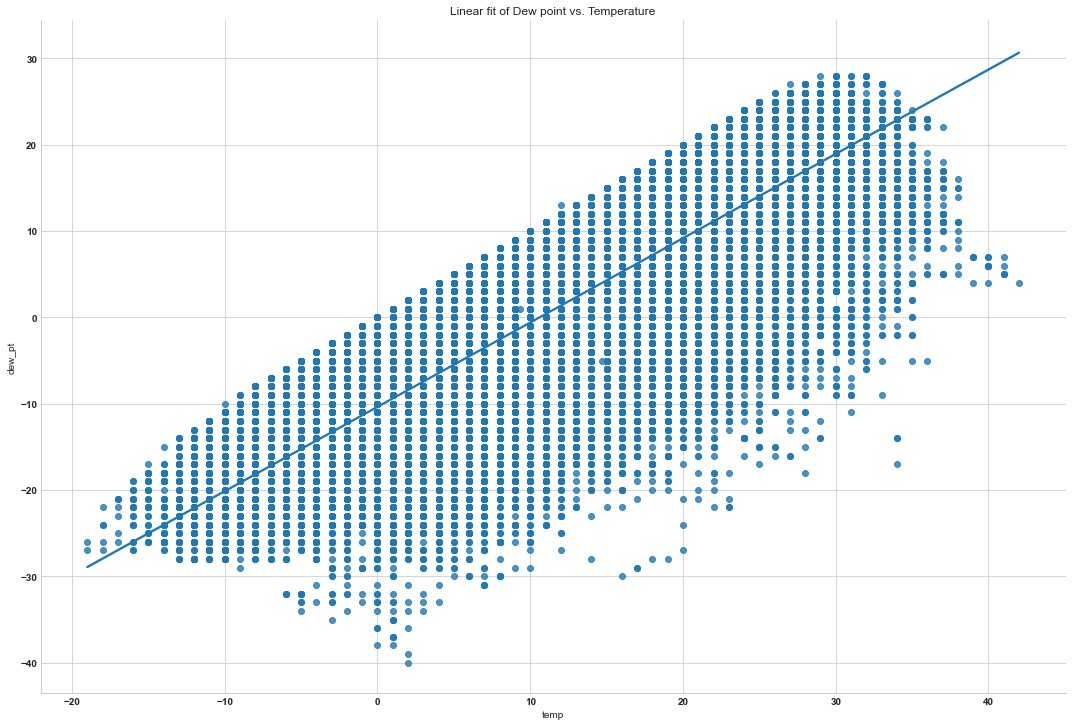

In [20]:
plt.figure(figsize = (12, 8))
sns.lmplot(x = 'temp', y = 'dew_pt', data = beijing_new, aspect = 1.5, height = 10)
plt.title('Linear fit of Dew point vs. Temperature')

### Univariate plots

c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Univariate disribution of particulate matters')

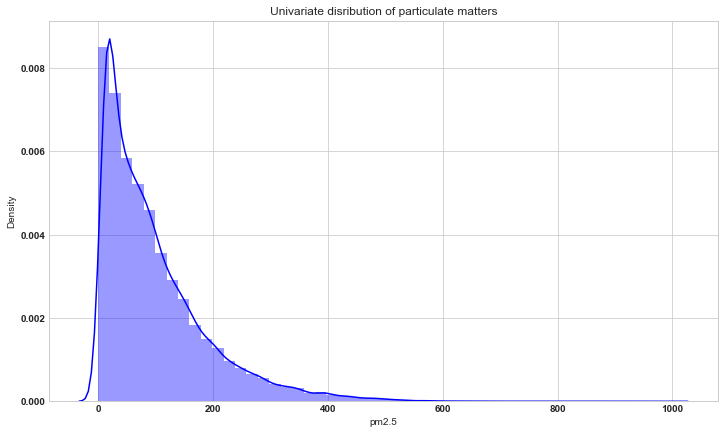

In [21]:
plt.figure(figsize = (12, 7))
sns.distplot(beijing_new['pm2.5'], color = 'blue')
plt.title('Univariate disribution of particulate matters')

Plot is right-skewed. Plot log-converted scale

Log conversion didn't owrk




c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

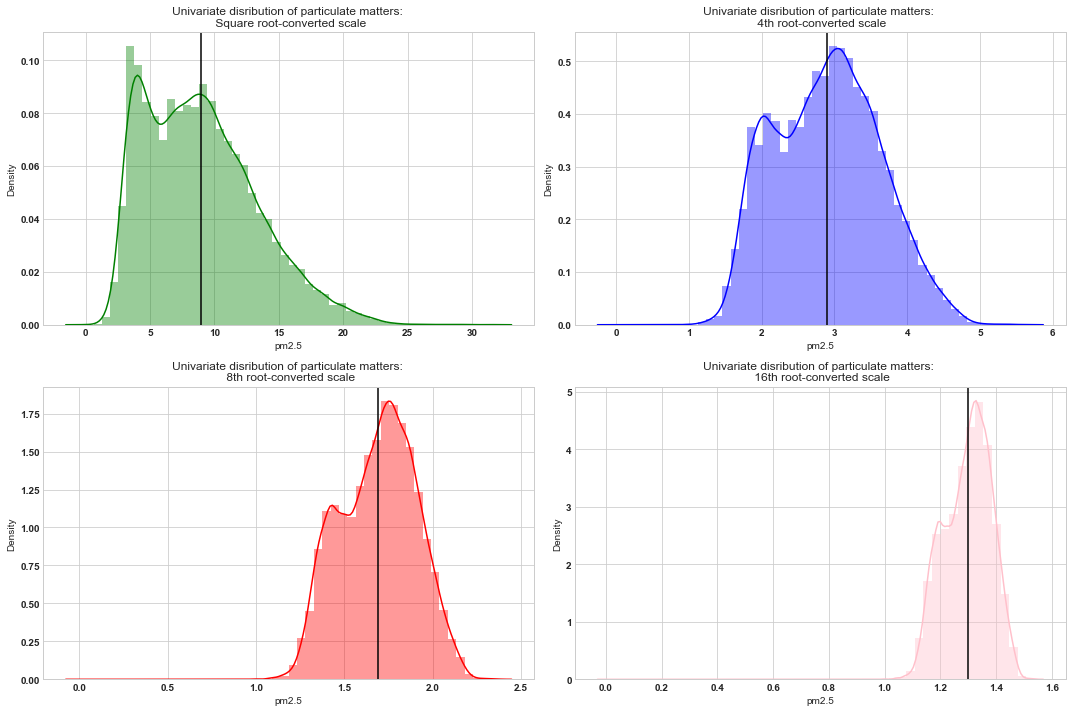

In [23]:
# Do square-root conversion
# First, change integer type of pm2.5
a = plt.figure(figsize = (15, 10))

ax1 = a.add_subplot(221)
sns.distplot(np.sqrt(beijing_new['pm2.5']), color = 'green', ax = ax1)
ax1.axvline(np.sqrt(beijing_new['pm2.5']).mean(), color = 'black')
ax1.set_title('Univariate disribution of particulate matters: \n Square root-converted scale')

ax2 = a.add_subplot(222)
sns.distplot(np.sqrt(np.sqrt(beijing_new['pm2.5'])), color = 'blue', ax = ax2)
ax2.axvline(np.sqrt(np.sqrt(beijing_new['pm2.5'])).mean(), color = 'black')
ax2.set_title('Univariate disribution of particulate matters: \n 4th root-converted scale')

ax3 = a.add_subplot(223)
sns.distplot(np.sqrt(np.sqrt(np.sqrt(beijing_new['pm2.5']))), color = 'red', ax = ax3)
ax3.axvline(np.sqrt(np.sqrt(np.sqrt(beijing_new['pm2.5']))).mean(), color = 'black')
ax3.set_title('Univariate disribution of particulate matters: \n 8th root-converted scale')

ax4 = a.add_subplot(224)
sns.distplot(np.sqrt(np.sqrt(np.sqrt(np.sqrt(beijing_new['pm2.5'])))), color = 'pink', ax = ax4)
ax4.axvline(np.sqrt(np.sqrt(np.sqrt(np.sqrt(beijing_new['pm2.5'])))).mean(), color = 'black')
ax4.set_title('Univariate disribution of particulate matters: \n 16th root-converted scale')

a.tight_layout()

### Box plots

Text(0.5, 1.0, 'Box plot of particulate matter concentration Vs. wind direction')

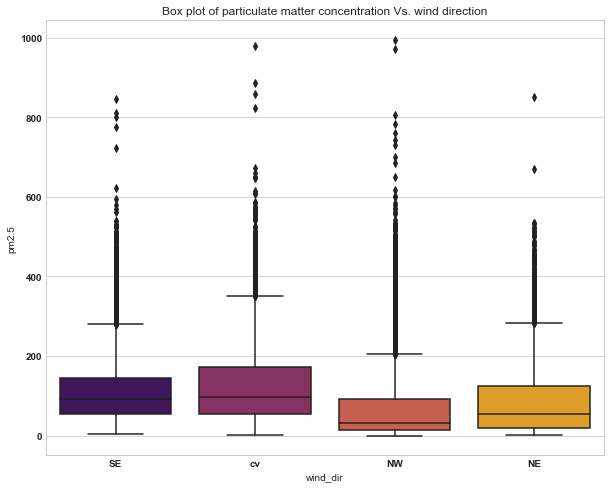

In [24]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'wind_dir', y = 'pm2.5', data = beijing_new, palette = 'inferno')
plt.title('Box plot of particulate matter concentration Vs. wind direction')

### Violin plots 

Text(0.5, 1.0, 'Violin plot of particulate matter concentration Vs. wind direction')

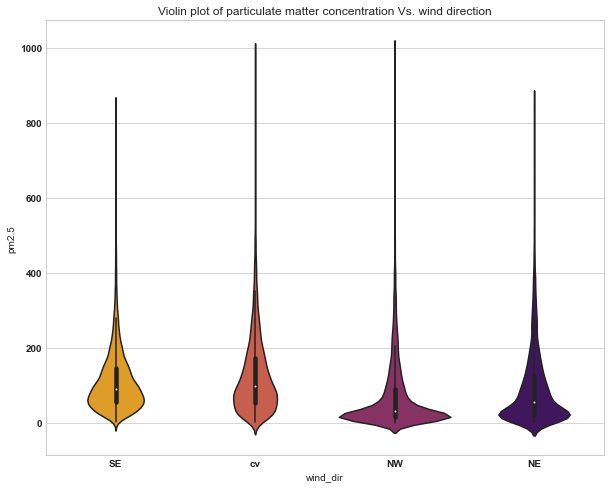

In [25]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'wind_dir', y = 'pm2.5', data = beijing_new, palette = 'inferno_r')
plt.title('Violin plot of particulate matter concentration Vs. wind direction')

### Scatterplots

Text(0.5, 1.0, 'Scatter plot of particulate matter concentration Vs. wind direction')

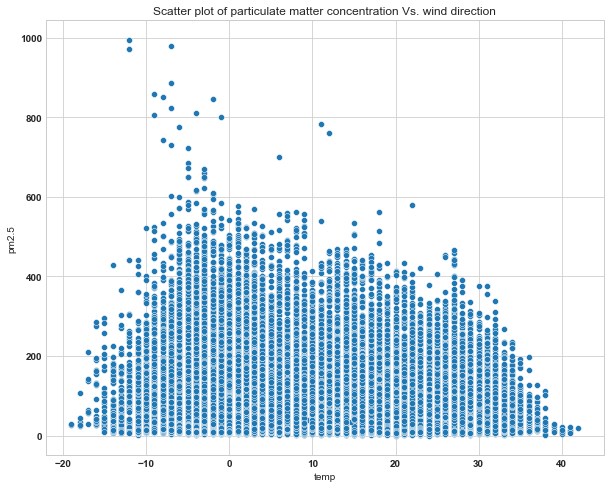

In [26]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'temp', y = 'pm2.5', data = beijing_new, palette = 'turbo')
plt.title('Scatter plot of particulate matter concentration Vs. wind direction')

### Group data by specific variables

In [27]:
beijing_new.groupby('wind_dir').agg(['mean', 'min', 'max', 'std'])['pm2.5']

,mean,min,max,std
wind_dir,,,,
NE,90.177670,1.0,852.0,95.196825
NW,70.127633,0.0,994.0,89.064152
SE,110.821588,3.0,845.0,80.050435
cv,126.151945,2.0,980.0,100.402930


## Dummy-recode categorical variables

In [28]:
beijing_recode = pd.get_dummies(data = beijing_new, columns = ['wind_dir'], prefix = 'wind', prefix_sep = '_', drop_first = True, dtype = 'int8')

In [29]:
print('The raw data contains the following variables: \n' + str(beijing_new.columns.values))
print('The raw data has', beijing_new.shape[0], 'rows and', beijing_new.shape[1], 'columns.')
print('\nThe recoded data has the following variables:\n', beijing_recode.columns.values)
print('The recoded data has ' + str(beijing_recode.shape[0]) + ' rows and ' + str(beijing_recode.shape[1]) + ' columns.')

The raw data contains the following variables: 
['hour' 'pm2.5' 'dew_pt' 'temp' 'pres' 'wind_dir' 'wind_sp' 'snow_hrs'
 'rain_hrs']
The raw data has 41757 rows and 9 columns.

The recoded data has the following variables:
 ['hour' 'pm2.5' 'dew_pt' 'temp' 'pres' 'wind_sp' 'snow_hrs' 'rain_hrs'
 'wind_NW' 'wind_SE' 'wind_cv']
The recoded data has 41757 rows and 11 columns.


In [30]:
beijing_recode.head(5)

,hour,pm2.5,dew_pt,temp,pres,wind_sp,snow_hrs,rain_hrs,wind_NW,wind_SE,wind_cv
24,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,1,0
25,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,1,0
26,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,1,0
27,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,1,0
28,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,1,0


## Box-Cox Transformation

In [31]:
from scipy.stats import boxcox

In [32]:
# y_bc, ci, lam = boxcox(beijing_recode['pm2.5'], alpha = 0.05)
# ci, lam

# boxcox not working
# Instead use the root-conversion (16th root) in the univariate plot section above

In [33]:
beijing_recode['pm2.5'] = np.sqrt(np.sqrt(np.sqrt(np.sqrt(beijing_new['pm2.5']))))
beijing_recode.head(5)

,hour,pm2.5,dew_pt,temp,pres,wind_sp,snow_hrs,rain_hrs,wind_NW,wind_SE,wind_cv
24,0,1.354914,-16,-4.0,1020.0,1.79,0,0,0,1,0
25,1,1.366600,-15,-4.0,1020.0,2.68,0,0,0,1,0
26,2,1.372737,-11,-5.0,1021.0,3.57,0,0,0,1,0
27,3,1.383901,-7,-5.0,1022.0,5.36,1,0,0,1,0
28,4,1.360638,-7,-5.0,1022.0,6.25,2,0,0,1,0


c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of 16th root-converted pm value')

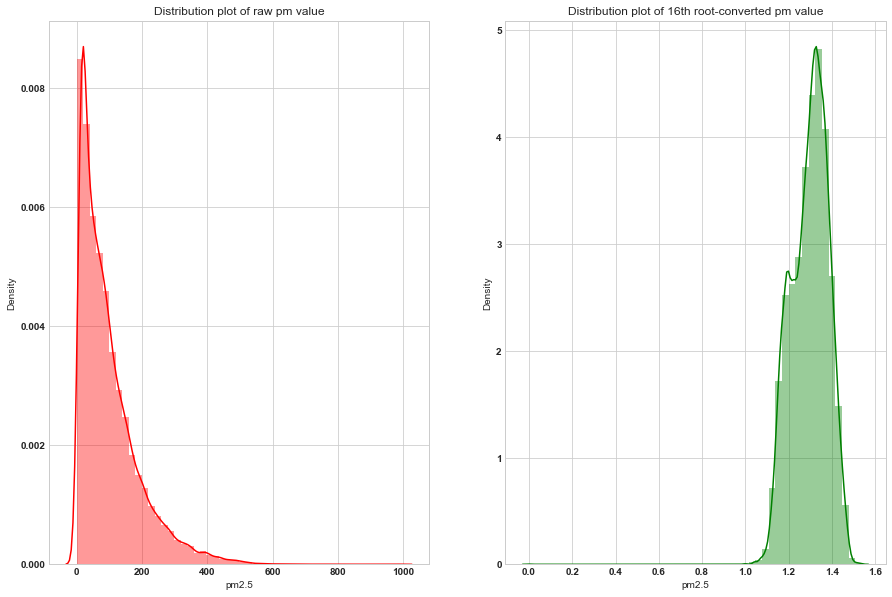

In [34]:
# Check that the transformation moved the variable's shape closer to normal
c = plt.figure(figsize = (15, 10))

a1 = c.add_subplot(121)
sns.distplot(beijing_new['pm2.5'], color = 'red', ax = a1)
a1.set_title('Distribution plot of raw pm value')

a2 = c.add_subplot(122)
sns.distplot(beijing_recode['pm2.5'], color = 'green', ax = a2)
a2.set_title('Distribution plot of 16th root-converted pm value')

## Train-test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# split the data into IVs and DV
x = beijing_recode.drop('pm2.5', axis = 1)
y = beijing_recode['pm2.5']

In [37]:
# split into test sample and train train sample

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

## Model Building

### Using the normal equation approach

First, add a feature  𝐱0=1  to our original data set:

In [38]:
x_train.head(5)

,hour,dew_pt,temp,pres,wind_sp,snow_hrs,rain_hrs,wind_NW,wind_SE,wind_cv
7718,14,2,9.0,1018.0,4.92,0,0,0,1,0
4066,10,18,26.0,1005.0,0.89,0,0,0,0,1
26740,4,-12,-6.0,1027.0,0.45,0,0,0,0,1
33335,23,1,8.0,1023.0,1.78,0,0,0,0,1
41354,2,17,18.0,1010.0,0.89,0,0,0,0,1


In [39]:
# add x0 =1 to both train and test samples
x_train_0 = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test_0 = np.c_[np.ones((x_test.shape[0], 1)), x_test]

Next, build model using the linear regression equation  $\mathbf{\theta = (X^T X)^{-1} X^Ty}$:

In [40]:
theta = np.matmul(np.linalg.inv(np.matmul(x_train_0.T, x_train_0)), np.matmul(x_train_0.T, y_train))

In [41]:
# name the parameters
para = ['theta_' + str(j) for j in range(x_train_0.shape[1])]
para

['theta_0',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4',
 'theta_5',
 'theta_6',
 'theta_7',
 'theta_8',
 'theta_9',
 'theta_10']

In [42]:
variables = ['intersect: x0=1'] + list(x.columns.values)
variables

['intersect: x0=1',
 'hour',
 'dew_pt',
 'temp',
 'pres',
 'wind_sp',
 'snow_hrs',
 'rain_hrs',
 'wind_NW',
 'wind_SE',
 'wind_cv']

In [43]:
paras_df = pd.DataFrame({'Parameters':para, 'Columns':variables, 'Theta':theta})
paras_df

,Parameters,Columns,Theta
0,theta_0,intersect: x0=1,3.060344
1,theta_1,hour,0.001075
2,theta_2,dew_pt,0.004493
3,theta_3,temp,-0.006313
4,theta_4,pres,-0.001691
5,theta_5,wind_sp,-0.000274
6,theta_6,snow_hrs,-0.001637
7,theta_7,rain_hrs,-0.005927
8,theta_8,wind_NW,-0.003860
9,theta_9,wind_SE,0.044654


### Using Sklearn module

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [46]:
sk_theta = [linreg.intercept_] + list(linreg.coef_)
sk_theta

[3.060344360475336,
 0.0010750007179479097,
 0.004493044904091808,
 -0.006313330182321858,
 -0.0016905382262440106,
 -0.00027393607107144535,
 -0.0016371279052406229,
 -0.005926964837625898,
 -0.0038600446248417716,
 0.044654360379599,
 0.031854767833900725]

In [47]:
# For comparison, place the sk-thetas in the same data frame as the normal thetas
paras_all = paras_df.join(pd.Series(sk_theta, name = 'sk_Theta'))
paras_all

,Parameters,Columns,Theta,sk_Theta
0,theta_0,intersect: x0=1,3.060344,3.060344
1,theta_1,hour,0.001075,0.001075
2,theta_2,dew_pt,0.004493,0.004493
3,theta_3,temp,-0.006313,-0.006313
4,theta_4,pres,-0.001691,-0.001691
5,theta_5,wind_sp,-0.000274,-0.000274
6,theta_6,snow_hrs,-0.001637,-0.001637
7,theta_7,rain_hrs,-0.005927,-0.005927
8,theta_8,wind_NW,-0.003860,-0.003860
9,theta_9,wind_SE,0.044654,0.044654


The theta values are the same for both methods.

## Model Evaluation

### Using the normal equation approach

Predicted y ($\mathbf{\hat{y}}$) = $\mathbf{X*\theta}$:

In [48]:
# Calculate predicted y
y_pred_norm = np.matmul(x_test_0, theta)

MSE ($\mathbf{ J(\theta)}$) = $\mathbf{\frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$:

In [49]:
mse = np.sum((y_pred_norm - y_test)**2) / y_test.shape[0]

R_squared ($\mathbf{R^2}$) = $\mathbf{1 - \frac {SSE}{SST}}$

In [50]:
# sse (sum of square error) = sum((y_hat - y_i)^2)
sse = np.sum((y_pred_norm - y_test)**2)

# sst (sum of square total) = sum((y_i - y_bar)^2)
sst = np.sum((y_test - y_test.mean())**2)

R_sq = 1 - (sse/sst)

In [51]:
print('The mean square error of the model, using normal equation is',mse)
print('The R_squared of the model, using normal equation is ' + str(R_sq))

The mean square error of the model, using normal equation is 0.004168063503944146
The R_squared of the model, using normal equation is 0.4078489435425776


### Using the Sklearn module

In [52]:
# Calculate predicted y
y_pred_sk = linreg.predict(x_test)

In [53]:
# Calculate mean squared error
from sklearn.metrics import mean_squared_error

mse_sk = mean_squared_error(y_pred_sk, y_test)

In [54]:
# Calculate R_squared
R_sq_sk = linreg.score(x_test, y_test)

In [55]:
print('The mean square error of the model, using normal equation is',mse)
print('The mean square error of the model, using Sklearn is '+ str(mse_sk))

print('The R_squared of the model, using normal equation is ' + str(R_sq))
print('The R_squared of the model, using Sklearn is', R_sq_sk)

The mean square error of the model, using normal equation is 0.004168063503944146
The mean square error of the model, using Sklearn is 0.00416806350393778
The R_squared of the model, using normal equation is 0.4078489435425776
The R_squared of the model, using Sklearn is 0.407848943543482


The statistics are the same on both approaches!

## Model Validation
Linear regression assumptions are tested next

### 1. Linearity

c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual vs. fitted values')

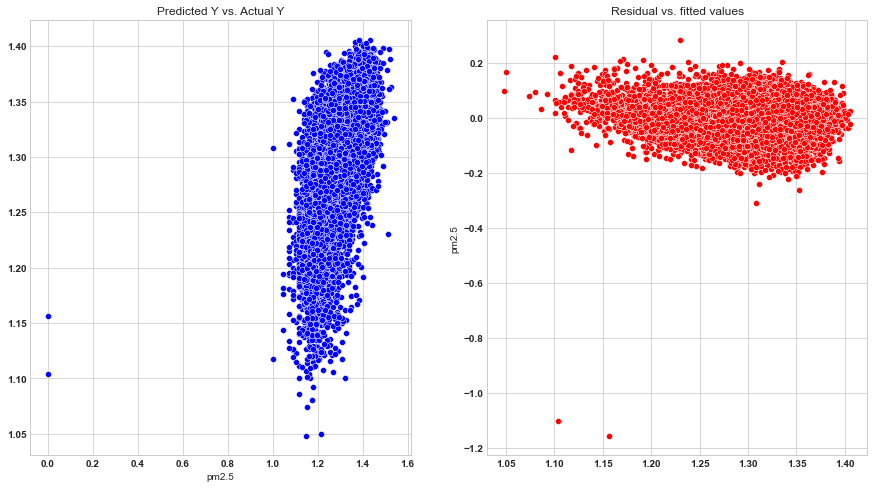

In [56]:
d = plt.figure(figsize = (15, 8))

# predicted y vs. actual y
b1 = d.add_subplot(121)
sns.scatterplot(y_test, y_pred_sk, color = 'blue', ax = b1)
b1.set_title('Predicted Y vs. Actual Y')

residual =  y_test - y_pred_sk
# residual vs. fitted values (a.k.a predicted y)
b2 = d.add_subplot(122)
sns.scatterplot(y_pred_sk, residual, color = 'red', ax = b2)
b2.set_title('Residual vs. fitted values')


### 2. Homoscedasticity

c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Check for homoscedasticity')

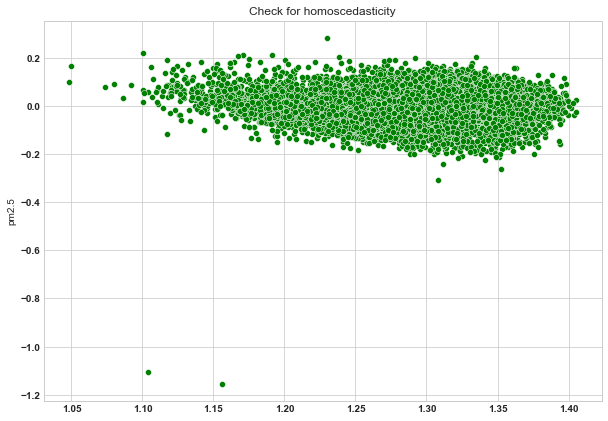

In [57]:
# Check for homoscedasticity (same graph as in right above)
plt.figure(figsize = (10, 7))
sns.scatterplot(y_pred_sk, residual, color = 'green')
plt.title('Check for homoscedasticity')


### 3. Residual normality and mean

c:\Users\tohaj\Box\Programming\Data Science\Python Learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual normality and mean')

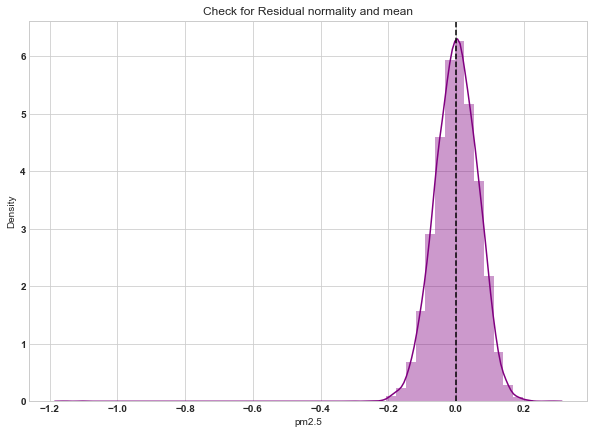

In [58]:
plt.figure(figsize = (10, 7))
sns.distplot(residual, bins = 50, color = 'purple')
plt.axvline(residual.mean(), color = 'black', linestyle = '--')
plt.title('Check for Residual normality and mean')


### 4. Multivariate normality

Text(0.5, 1.0, 'Check to multivariate normality: \nthe Q-Q plot')

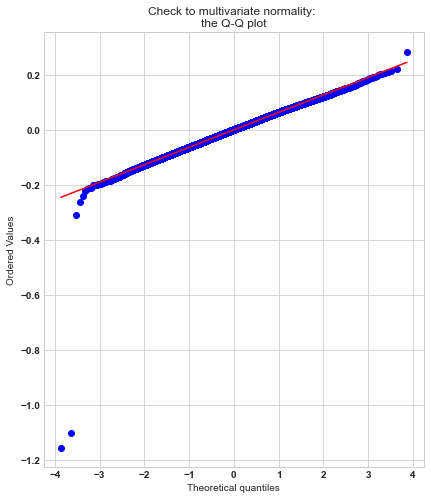

In [59]:
h = plt.figure(figsize = (15, 8))

import scipy as sp
ax = h.add_subplot(121)
_,(_,_,r) = sp.stats.probplot((y_test - y_pred_sk), fit = True, plot = ax)
plt.title('Check to multivariate normality: \nthe Q-Q plot')

### 5. Multicollinearity

In [60]:
VIF = 1 / (1-R_sq_sk)
VIF

1.6887582806726456